# Linear Model Favorable Case

Below we propose a data generating process that would be favorable for a linear regression. 


In [28]:
library(rpart)
library(rpart.plot)

In [29]:
dgp_linear <- function(n, p, mu, sigma){
  
  #x1 <- rnorm(n, mu, sigma)
  #X_list <- x1
  beta <- c(-5, -1, 0.5, 5, -0.5, -0.2, 0.1, 3, 4, -4)
  X <- c()
  eps <- rnorm(n, 0, 1)

  #Generate arbitrary number of covariates between 1 and 10
  for(i in 1:p){
      gen_x <- rnorm(n, mu, sigma)
      X <- cbind(X, gen_x)
  }
  
  beta <- beta [1 : p]
  Y <-  X %*% beta + eps
  data <- data.frame("Y" = Y, "X" = X)
  
  return(data)
}


We then use a simulation with 500 iterations to evaluate the relevant model characteristics

In [37]:
plot_ex <- NULL
result <- c()

for(i in 1:10){
    data_lin <- dgp_linear(100, p = i, 0, 2)
    train <- sample(nrow(data_lin), nrow(data_lin)/2)

    for(j in 1:500){

        OLS_fit <- lm(Y ~ ., data = data_lin, subset = train)
        OLS_pred <- predict(OLS_fit, data_lin[-train,])
        OLS_MSE <- mean(I(OLS_pred-data_lin[-train,1])^2)

        tree_fit <- rpart(Y ~ ., data = data_lin, subset = train)
        tree_pred <- predict(tree_fit, data_lin[-train,])
        tree_MSE <- mean(I(tree_pred-data_lin[-train,1])^2)
        
        cp <- tree_fit$cptable[which.min(tree_fit$cptable[,"xerror"]),"CP"]
        ptree_fit <- prune(tree_fit, cp = cp)
        ptree_pred <- predict(ptree_fit, data_lin[-train,])
        ptree_MSE <- mean(I(ptree_pred-data_lin[-train,1])^2)
        
        temp <- cbind("OLS_MSE" = OLS_MSE, "tree_MSE" = tree_MSE, "ptree_MSE" = ptree_MSE, "p" = i)
        result <- rbind(result, temp)
        plot_ex <- tree_fit
    }
}
result

OLS_MSE,tree_MSE,ptree_MSE,p
0.9922952,4.772444,4.772444,1
0.9922952,4.772444,4.772444,1
0.9922952,4.772444,4.772444,1
0.9922952,4.772444,4.772444,1
0.9922952,4.772444,4.772444,1
0.9922952,4.772444,4.772444,1
0.9922952,4.772444,4.772444,1
0.9922952,4.772444,4.772444,1
0.9922952,4.772444,4.772444,1
0.9922952,4.772444,4.772444,1


As we can see (and as we expected), the linear regression performs much better with the data-generating process which has **Y** as a linear function of **X**. In addition, more covariates has no effect on the linear model while the tree gets significantly worse.  

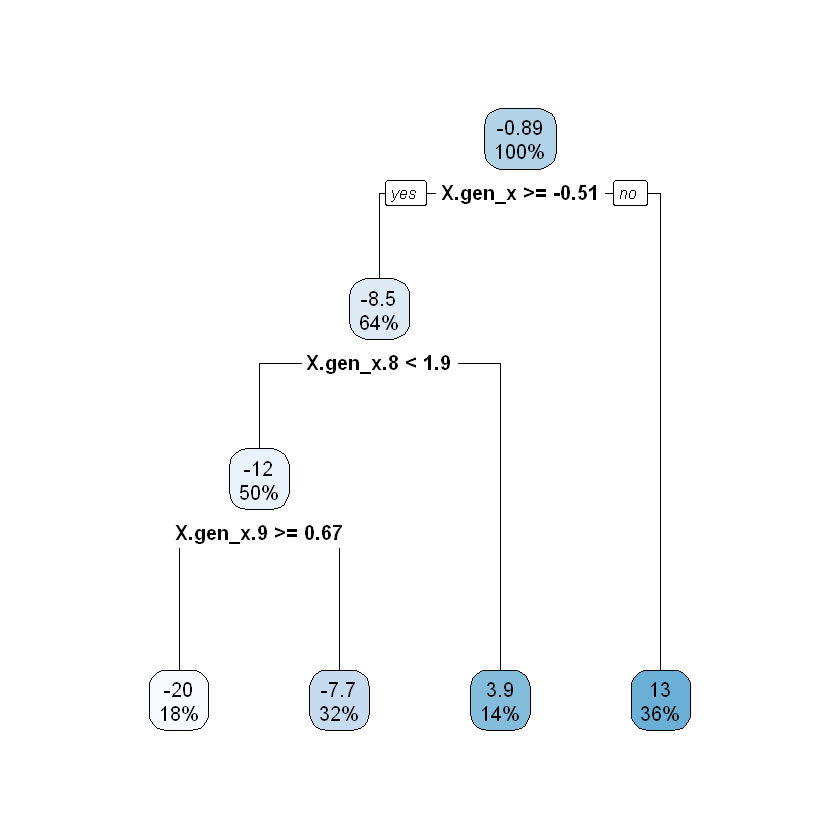

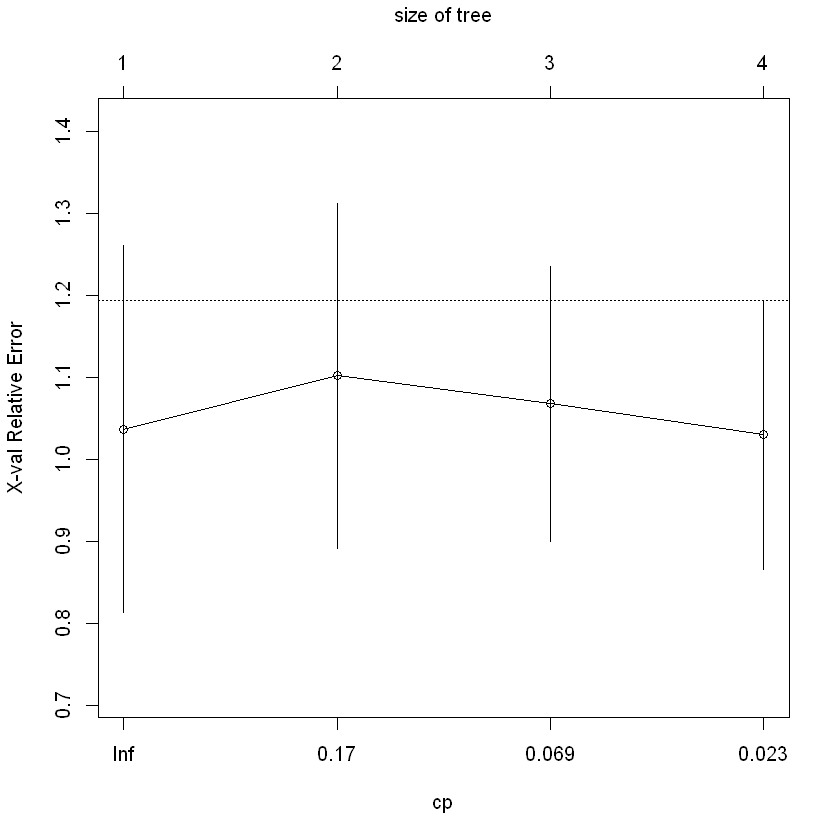

In [36]:
rpart.plot(plot_ex)
plotcp(plot_ex)

## When to use trees?

If we know the dgp is linear or we have a suspicion that the data is approximately linear, then it is in most cases better to revert to the OLS case. Recalling from the lecture, trees become more effective when we:

       -have a non-linear relationship between X and Y which requires more flexibility
       -want to focus on interpretability of the data
       
Often times it is useful to link the dependent variable to a tree form for people less familiar with data methods. A room of football players will likely be able to interpret how their different statistics relates to their salary if presented in a bunch of yes/no questions rather than the long form equation. In addition, linear and other simple models generally suffer from a high amount of bias, as relationships in reality are rarely linear.  